jetzt sim

In [10]:
from src.sampling import sample_salpeter, sample_metallicity
from src.stellar_physics import ms_lifetime_years, stellar_endpoint
from src.supernovae import is_type_ia, core_collapse_SN_type

Monte-Carlo-Simulation

population ziehen und sicherstellen

In [5]:
N = 100000
import numpy as np  
masses = sample_salpeter(N)
masses = np.atleast_1d(masses)
metallicities = sample_metallicity(N)
metallicities = np.atleast_1d(metallicities)
print("Sampled masses:", masses)
print("Sampled metallicities:", metallicities)

Sampled masses: [0.11157331 0.83929306 0.16953067 ... 0.15894089 0.17636087 0.2217886 ]
Sampled metallicities: [0.00974423 0.0276316  0.01516935 ... 0.02535183 0.00605927 0.00547675]


einzelstern physik anwenden :P

In [6]:
lifetimes = np.array([
    ms_lifetime_years(masses, metallicities)
    for masses, metallicities in zip(masses, metallicities)
])
print("Computed lifetimes:", lifetimes)

endstates = np.array([
    stellar_endpoint(m) 
    for m in np.array(masses)
    ])
print("Determined stellar endpoints:", endstates)

Computed lifetimes: [2.23677884e+12 1.77529903e+10 8.58711175e+11 ... 1.11811681e+12
 6.47519447e+11 3.57792204e+11]
Determined stellar endpoints: ['WD' 'WD' 'WD' ... 'WD' 'WD' 'WD']


supernovaeeee

In [7]:
cc_sn_types = np.array([
    core_collapse_SN_type(m)
    for m in masses
    ])  
print("Determined core-collapse SN types:", cc_sn_types)

ia_flags = np.array([
    is_type_ia(m)
    for m in masses
    ])  
print("Determined Type Ia flags:", ia_flags)

sn_types = np.where(ia_flags, "Type Ia", cc_sn_types)
print("Determined supernova types:", sn_types)

Determined core-collapse SN types: [None None None ... None None None]
Determined Type Ia flags: [False False False ... False False False]
Determined supernova types: [None None None ... None None None]


In [8]:
total_cc = np.sum(cc_sn_types != None)
total_Ia = np.sum(ia_flags)
total_SN = total_cc + total_Ia

print("===== SUMMARY =====")
print(f"Gesamtzahl Sterne: {N}")
print(f"Core-collapse SN:  {total_cc} ({total_cc/N*100:.3f} %)")
print(f"Type Ia SN:        {total_Ia} ({total_Ia/N*100:.3f} %)")
print(f"Alle Supernovas:   {total_SN} ({total_SN/N*100:.3f} %)")

unique, counts = np.unique(sn_types[sn_types != None], return_counts=True)
print("\nSupernova-Typen:")
for u, c in zip(unique, counts):
    print(f"{u}: {c}")


===== SUMMARY =====
Gesamtzahl Sterne: 100000
Core-collapse SN:  254 (0.254 %)
Type Ia SN:        965 (0.965 %)
Alle Supernovas:   1219 (1.219 %)

Supernova-Typen:
Type II: 196
Type Ia: 965
Type Ib: 38
Type Ic: 20


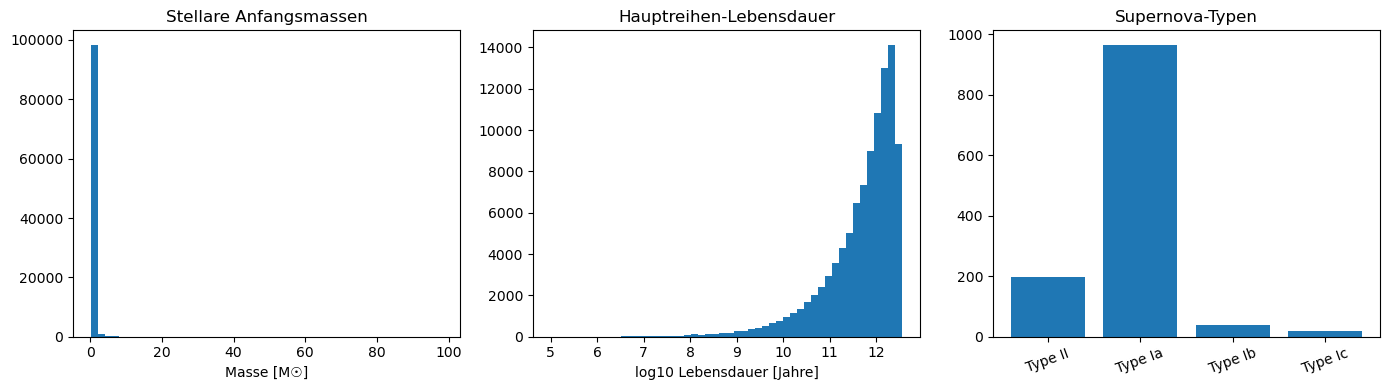

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
plt.hist(masses, bins=50)
plt.xlabel("Masse [M☉]")
plt.title("Stellare Anfangsmassen")

plt.subplot(1,3,2)
plt.hist(np.log10(lifetimes), bins=50)
plt.xlabel("log10 Lebensdauer [Jahre]")
plt.title("Hauptreihen-Lebensdauer")

plt.subplot(1,3,3)
plt.bar(unique, counts)
plt.title("Supernova-Typen")
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()